In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covidpath="/content/drive/MyDrive/Colab/covid_19_india.csv"

In [3]:
covid=pd.read_csv(covidpath)
covid.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
vaccinepath="/content/drive/MyDrive/Colab/covid_vaccine_statewise.csv"

In [5]:
vaccine=pd.read_csv(vaccinepath)

In [6]:
covid.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [7]:
covid.drop(["Sno","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [8]:
covid.head()

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,6:00 PM,Kerala,0,0,1
1,2020-01-31,6:00 PM,Kerala,0,0,1
2,2020-02-01,6:00 PM,Kerala,0,0,2
3,2020-02-02,6:00 PM,Kerala,0,0,3
4,2020-02-03,6:00 PM,Kerala,0,0,3


In [9]:
covid['Active Cases']=covid['Confirmed']-(covid['Cured']+covid['Deaths'])

In [10]:
Statewise=pd.pivot_table(covid,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)

In [11]:
Statewise["Recovery Rate"]=Statewise["Cured"]*100/Statewise["Confirmed"]
Statewise["Mortality Rate"]=Statewise["Deaths"]*100/Statewise["Confirmed"]

In [12]:
Statewise=Statewise.sort_values(by="Confirmed",ascending=False)

In [13]:
Statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [14]:
Active=covid[["State/UnionTerritory","Date","Active Cases"]]

In [15]:
Most_Active_Cases=Active.groupby('State/UnionTerritory').max('Date').sort_values(by='Active Cases',ascending=False).reset_index()
Most_Active_Cases.head()

,State/UnionTerritory,Active Cases
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783


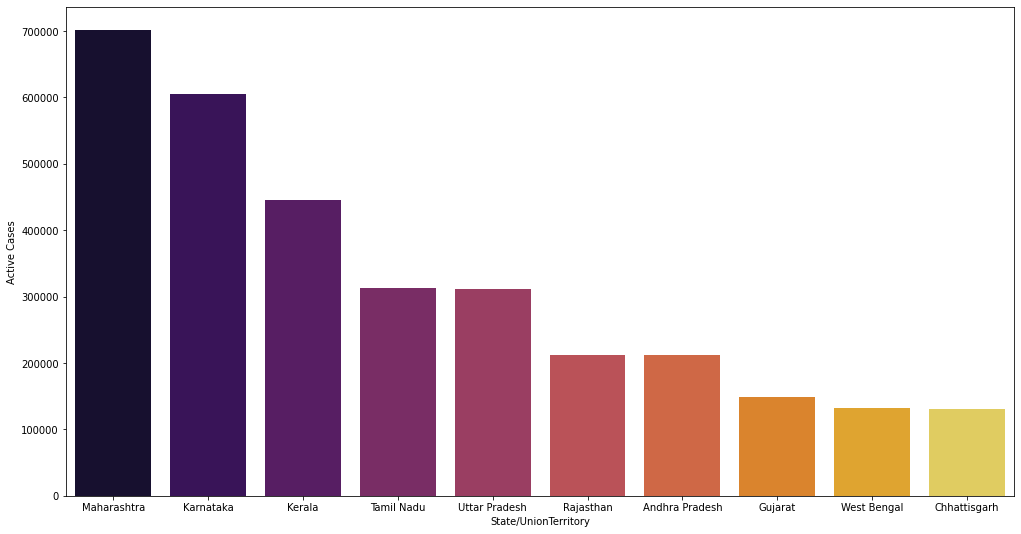

In [16]:
plt.figure(figsize=(17,9))
plt.title="top 10 Active Cases"
sns.barplot(data=Most_Active_Cases.head(10),x='State/UnionTerritory',y='Active Cases',palette='inferno').set_title="top 10 Active Cases"


Text(0.5, 1.0, 'Top 5 affected states')

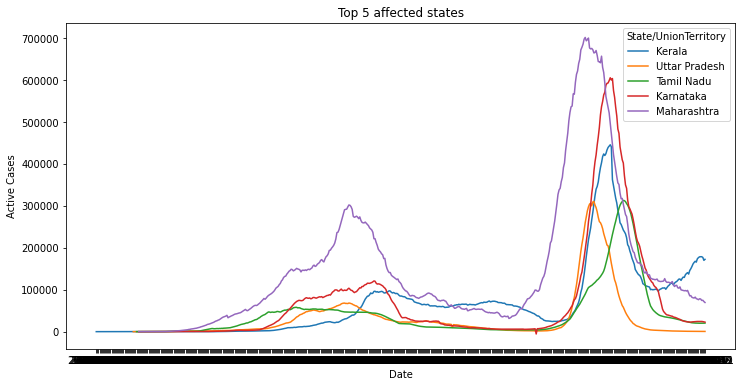

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Active[Active['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x='Date',y='Active Cases',hue='State/UnionTerritory').set_title("Top 5 affected states")

In [18]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [19]:
vaccine.rename(columns={'Updated On':'Vaccine Date'},inplace=True)

In [20]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [21]:
vaccine.drop(['Sputnik V (Doses Administered)'],inplace=True, axis=1)

In [22]:
vaccine.drop(['AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],inplace=True, axis=1)

In [23]:
male=vaccine['Male(Individuals Vaccinated)'].sum()
female=vaccine['Female(Individuals Vaccinated)'].sum()
Totalvaccinated=[male,female]
print(Totalvaccinated)
print(male)

[7138698858.0, 6321628736.0]
7138698858.0


In [24]:
import plotly.express as px
from plotly.subplots import make_subplots

In [25]:
px.pie(names=["male","female"],values=[male,female], title="Male and female vaccination", )

In [33]:
vaccin=vaccine[vaccine.State!='India']
vaccin

,Vaccine Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
max_vac=vaccin.groupby(by='State')['Total Individuals Vaccinated'].sum('Total Individuals Vaccinated').sort_values(ascending=False)
max_vac

State
Maharashtra                                 1.403075e+09
Uttar Pradesh                               1.200575e+09
Rajasthan                                   1.141163e+09
Gujarat                                     1.078261e+09
West Bengal                                 9.250227e+08
Karnataka                                   8.685235e+08
Madhya Pradesh                              7.718640e+08
Bihar                                       6.608479e+08
Kerala                                      6.208252e+08
Andhra Pradesh                              5.645911e+08
Tamil Nadu                                  5.437461e+08
Odisha                                      5.105198e+08
Chhattisgarh                                4.353092e+08
Telangana                                   3.933718e+08
Haryana                                     3.637547e+08
Delhi                                       3.057372e+08
Jharkhand                                   2.891507e+08
Punjab                   

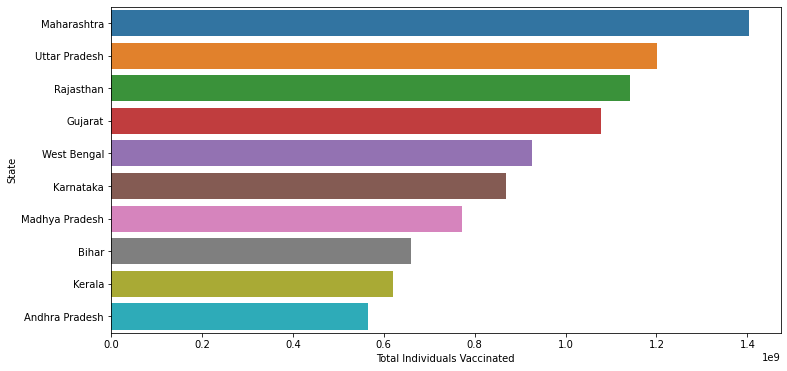

In [38]:
plt.figure(figsize=(12,6))
plt.title="Top 10 States Vaccinated"
sns.barplot(x=max_vac.head(10),y=max_vac.head(10).index)